# Regression 

## R2 and Density

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def make_r2_plot(y_test, y_pred, name, xlim, ylim, has_legend=True,
              color="#5402A3", figsize=(8,8), fontsize=16):
    r_squared = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    print(f"R2 {r_squared:.2f} | RMSE {rmse:.1f} | MAE {mae:.1f}")
    
    fig, ax = plt.subplots(figsize=figsize)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.scatter(y_pred, y_test, alpha=0.2, color=color)
    plt.plot(np.arange(100), np.arange(100), ls="--", c=".3")

    if has_legend: 
        r2_patch = mpatches.Patch(label="R2 = {:.3f}".format(r_squared), color=color)
        rmse_patch = mpatches.Patch(label="RMSE = {:.1f}".format(rmse), color=color)
        mae_patch = mpatches.Patch(label="MAE = {:.1f}".format(mae), color=color)
        plt.legend(handles=[r2_patch, rmse_patch, mae_patch], fontsize=fontsize)
    ax.set_ylabel('Measured', fontsize=fontsize)
    ax.set_xlabel('Predicted', fontsize=fontsize)
    ax.set_title(f"Result for {name} Dataset", fontsize=fontsize)
    # plt.savefig(f"result/images/{name}_R2.png", dpi=300, bbox_inches='tight')
    return fig

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def make_density_plot(df, name, has_legend=True, color="#5402A3", figsize=(8,8), fontsize=16):
    df['diff'] = abs(df.ytest-df.ypred)
    df['logAE'] = np.log1p(df['diff']) 
    mae = df['logAE'].mean()

    fig, ax = plt.subplots(figsize=figsize)
    sns.kdeplot(df['logAE'], color=color, fill=True)

    if has_legend:
        y_test, y_pred = df.ytest.to_list(), df.ypred.to_list()
        r_squared = r2_score(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred) ** 0.5
        mae = mean_absolute_error(y_test, y_pred)
        r2_patch = mpatches.Patch(label="R2 = {:.3f}".format(r_squared), color=color)
        rmse_patch = mpatches.Patch(label="RMSE = {:.1f}".format(rmse), color=color)
        mae_patch = mpatches.Patch(label="MAE = {:.1f}".format(mae), color=color)
        plt.legend(handles=[r2_patch, rmse_patch, mae_patch], fontsize=fontsize)
    
    ax.set_ylabel('Density', fontsize=fontsize)
    ax.set_xlabel('log(absolute error)', fontsize=fontsize)
    ax.set_title(name, fontsize=fontsize)
    return fig 


In [3]:
import os 
from rdkit.Chem import Draw, AllChem

def save_rxn_svg(rxn_smiles, label, pred, prefix='img'):
    save_dir = 'result/images/'
    name = f"{prefix}_{label:.6f}_{pred:.6f}.svg"

    rxn = AllChem.ReactionFromSmarts(rxn_smiles,useSmiles=True)
    rxn_img = Draw.ReactionToImage(rxn, useSVG=True)
    file = os.path.join(save_dir, name)
    with open(file, 'w') as f:
        f.write(rxn_img)
    # img = SVG(filename=file) 
    # display(img)
    with open(os.path.join(save_dir, "example_images.txt"), 'a') as f:
        f.write("=="*10 + "\n")
        f.write(f"rxn_smiles={rxn_smiles}\n")
        f.write(f"label={label}\n")
        f.write(f"pred={pred}\n")
        f.write("=="*10 + "\n")
    display(rxn_img)

In [4]:
colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#fdbf6f', '#a6cee3']

R2 0.97 | RMSE 5.0 | MAE 3.4


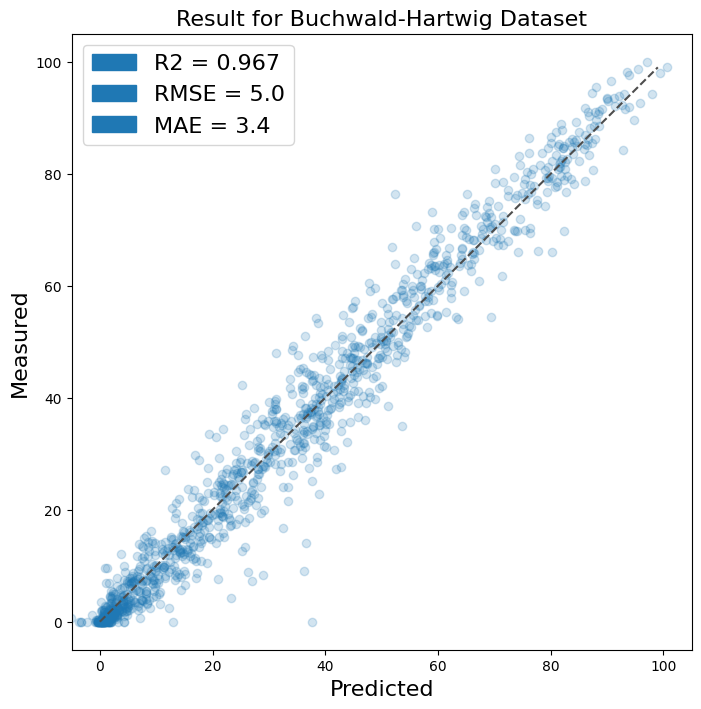

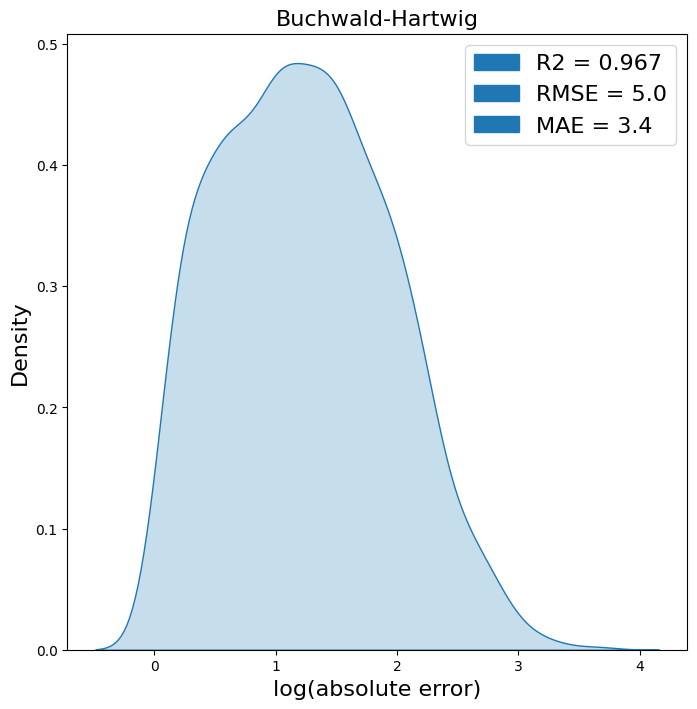

In [5]:
import pandas as pd 
name = "Buchwald-Hartwig"
df = pd.read_csv("result/data/Buchwald-Hartwig.csv")
y_test, y_pred = df.ytest.to_list(), df.ypred.to_list()
assert len(y_test) == len(y_pred)

color = colors[0]
fig1 = make_r2_plot(y_test, y_pred, name, xlim=(-5, 105), ylim=(-5, 105), has_legend=True, color=color)
fig1.savefig(f"result/images/{name}_R2.png", dpi=300, bbox_inches='tight')

fig2 = make_density_plot(df, name, color=color)
fig2.savefig(f"result/images/{name}_Density.png", dpi=300, bbox_inches='tight')

In [7]:
df_sorted = df.sort_values(by="diff")
df_sorted.reset_index(drop=True, inplace=True)
df_sorted.head(10)  

,ytest,ypred,diff,logAE
0,0.000000,0.021000,0.021000,0.020782
1,37.935670,37.914562,0.021108,0.020889
2,22.355122,22.383396,0.028274,0.027881
3,51.647648,51.617805,0.029843,0.029406
4,50.124677,50.163326,0.038649,0.037921
5,79.181907,79.221840,0.039933,0.039157
6,42.812928,42.764570,0.048358,0.047225
7,9.109122,9.157646,0.048524,0.047383
8,36.707280,36.757640,0.050360,0.049133
9,63.990722,63.938095,0.052627,0.051289


In [28]:
cv_name = 'FullCV_09'
data_path = "Hiero/data_scaler/"
test_df = pd.read_csv(data_path + '/Buchwald-Hartwig/random_split/' + cv_name + '_test_temp_scaler.csv')
test_df = test_df[['reaction', 'origin_output']]
test_df.columns = ['text', 'labels']
test_df.head()

,text,labels
0,COc1ccc(Cl)cc1*Cc1ccc(N)cc1*O=S(=O)(O[Pd]1c2cc...,0.538585
1,Brc1ccccn1*Cc1ccc(N)cc1*O=S(=O)(O[Pd]1c2ccccc2...,63.165204
2,FC(F)(F)c1ccc(I)cc1*Cc1ccc(N)cc1*O=S(=O)(O[Pd]...,36.441381
3,COc1ccc(I)cc1*Cc1ccc(N)cc1*O=S(=O)(O[Pd]1c2ccc...,45.500899
4,FC(F)(F)c1ccc(Cl)cc1*Cc1ccc(N)cc1*O=S(=O)(O[Pd...,26.526465


In [39]:
for i in range(1, 10):
    label, pred = df_sorted.iloc[i, 0], df_sorted.iloc[i, 1]
    smi = test_df[round(test_df.labels, 6)==round(label, 6)].text.values[0]
    smis = smi.split("*")
    reac = ".".join(smis[:-1])
    prod = smis[-1]
    rxn_smiles = f"{reac}>>{prod}" 
    save_rxn_svg(rxn_smiles, label, pred, prefix=name) 

In [45]:
import sys
import os
import json 
import argparse
from Hiero.Hiero.main import regression

def repred(rxn_smiles, dataset, task_id="999", radius=2):
    params = {
        "task_id": task_id,
        "smiles": rxn_smiles, 
        "dataset": dataset, 
        "radius": radius,
        "seed": 0,
    }
    config = argparse.Namespace(**params)

    if config.dataset =='Buchwald-Hartwig':
            config.max_sentence_length = 150
            config.min_count = 0
            config.class_num = 1
            config.gru_size = 50
    if config.dataset =='suzuki':
            config.max_sentence_length = 200
            config.min_count = 0
            config.class_num = 1
            config.gru_size = 50
    if config.dataset =='denmark':
            config.max_sentence_length = 100 
            config.min_count = 0
            config.class_num = 1
            config.gru_size = 50
    if config.dataset == 'uspto_1k':
            config.max_sentence_length = 400
            config.min_count = 10
            config.class_num = 1000
            config.gru_size = 500
    config.cuda = True
    config.gpu = 0
    config.embedding_size = 200 
    config.word2id = None
    res = regression(config)
    res = json.loads(res)
    return res["predicted"] 

rxn_smi = test_df[round(test_df.labels, 6)==round(df_sorted.iloc[1, 0], 6)].text.values[0]
repred(rxn_smi, name) 

2024-01-19 13:43:05,218-/Users/yhcao/Library/CloudStorage/OneDrive-tju.edu.cn/01_Work/Papers/05-NLP-RXN/Hiero-master/Hiero/Hiero/main.py[line:62]-INFO : ==========================================================================================
2024-01-19 13:43:05,220-/Users/yhcao/Library/CloudStorage/OneDrive-tju.edu.cn/01_Work/Papers/05-NLP-RXN/Hiero-master/Hiero/Hiero/main.py[line:63]-INFO : Input={"task_id": "999", "smiles": "FC(F)(F)c1ccc(Br)cc1*Cc1ccc(N)cc1*O=S(=O)(O[Pd]1c2ccccc2-c2ccccc2N~1)C(F)(F)F*COc1ccc(OC)c(P([C@]23C[C@H]4C[C@H](C[C@H](C4)C2)C3)[C@]23C[C@H]4C[C@H](C[C@H](C4)C2)C3)c1-c1c(C(C)C)cc(C(C)C)cc1C(C)C*CN1CCCN2CCCN=C12*Cc1cc(-c2ccccc2)on1*Cc1ccc(Nc2ccc(C(F)(F)F)cc2)cc1", "dataset": "Buchwald-Hartwig", "radius": 2, "seed": 0, "max_sentence_length": 150, "min_count": 0, "class_num": 1, "gru_size": 50, "cuda": true, "gpu": 0, "embedding_size": 200, "word2id": null}


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         Embedding-1               [-1, 1, 200]          55,200
               GRU-2  [[-1, 1, 100], [-1, 300, 50]]               0
            Linear-3               [-1, 1, 100]          10,100
               GRU-4  [[-1, 1, 100], [-1, 300, 50]]               0
            Linear-5               [-1, 1, 100]          10,100
           Dropout-6                  [-1, 100]               0
            Linear-7                    [-1, 1]             101
Total params: 75,501
Trainable params: 75,501
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 22.88
Params size (MB): 0.29
Estimated Total Size (MB): 23.17
----------------------------------------------------------------
None


2024-01-19 13:43:08,171-/Users/yhcao/Library/CloudStorage/OneDrive-tju.edu.cn/01_Work/Papers/05-NLP-RXN/Hiero-master/Hiero/Hiero/main.py[line:269]-INFO : Result={"task_id": "999", "rxntokens": ["F", "C", "c", "Br", "CF", "cC(F)(F)F", "cc(c)C", "ccc", "cc(c)Br", "cBr", "cC(F)(F)F", "cc(c)C(F)(F)F", "ccc(cc)C(F)(F)F", "cccc(c)C", "cccc(c)Br", "ccc(Br)cc", "cc(c)Br", "C", "c", "N", "cC", "cc(c)C", "ccc", "cc(c)N", "cN", "cc(c)C", "ccc(C)cc", "cccc(c)C", "cccc(c)N", "ccc(N)cc", "cc(c)N", "O", "S", "[Pd]", "c", "N", "C", "F", "O=S", "CS(=O)(=O)O", "SO[Pd]", "c[Pd](N)O", "cc(c)[Pd]", "ccc", "c-c(c)c", "cc(c)N", "cN[Pd]", "FC(F)(F)S", "CF", "CS(=O)(=O)O", "O=S(=O)(O[Pd])C(F)(F)F", "c[Pd](N)OS(C)(=O)=O", "cN[Pd](OS)c(c)c", "c-c(c)c(cc)[Pd](N)O", "cccc(c)[Pd]", "ccccc", "c-c(c)ccc", "ccc(-c(c)c)c(c)[Pd]", "ccc(-c(c)c)c(c)N", "cccc(c)N", "c-c(c)c(cc)N[Pd]", "c[Pd](O)Nc(c)c", "O=S(=O)(O)C(F)(F)F", "FC(F)(F)S", "C", "O", "c", "P", "CO", "cOC", "cc(c)O", "ccc", "cc(c)P", "cP(C)C", "CC(C)(C)P", "CCC

37.913787841796875

R2 0.87 | RMSE 0.1 | MAE 0.1


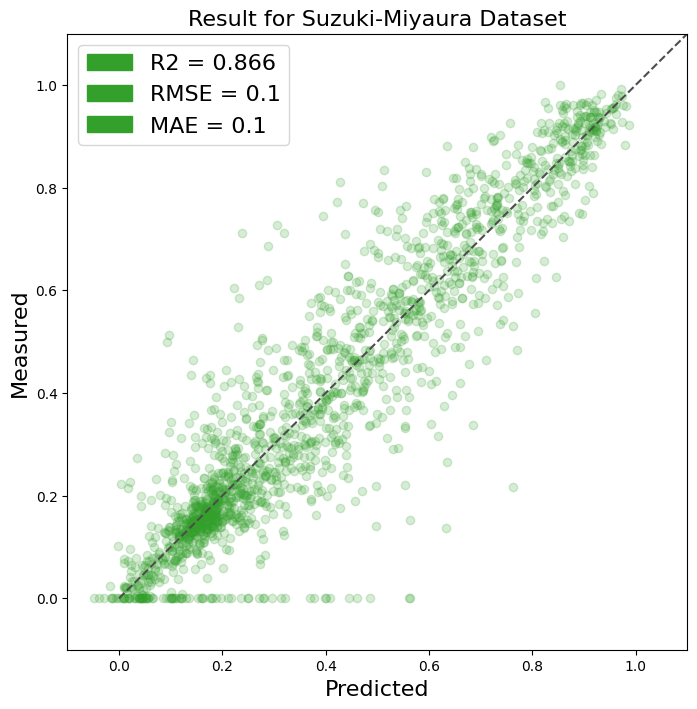

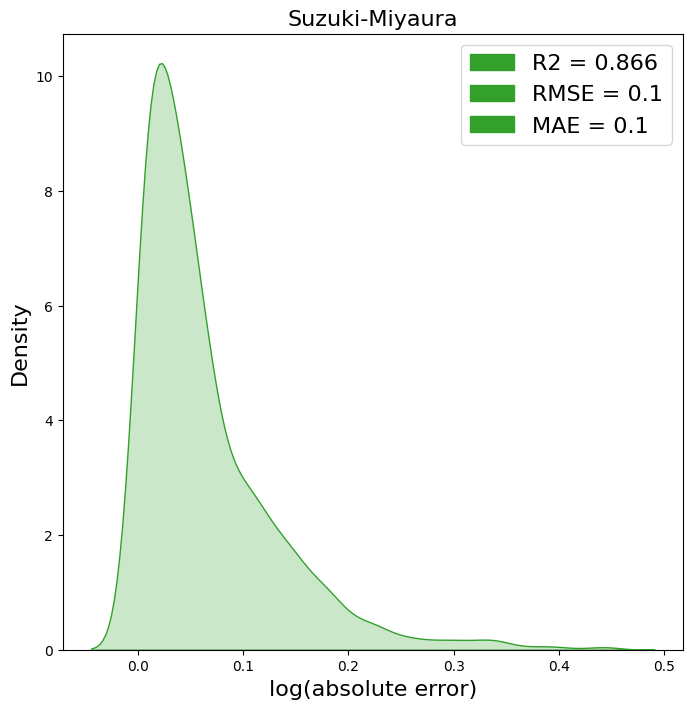

In [6]:
import pandas as pd 
name = 'Suzuki-Miyaura'
df = pd.read_csv("result/data/suzuki_R2.csv")
y_test, y_pred = df.ytest.to_list(), df.ypred.to_list()
assert len(y_test) == len(y_pred)

color = colors[1]
fig1 = make_r2_plot(y_test, y_pred, name, xlim=(-0.1, 1.1), ylim=(-0.1, 1.1), has_legend=True, color=color)
fig1.savefig(f"result/images/{name}_R2.png", dpi=300, bbox_inches='tight')

fig2 = make_density_plot(df, name, color=color)
fig2.savefig(f"result/images/{name}_Density.png", dpi=300, bbox_inches='tight')

R2 0.91 | RMSE 0.2 | MAE 0.1


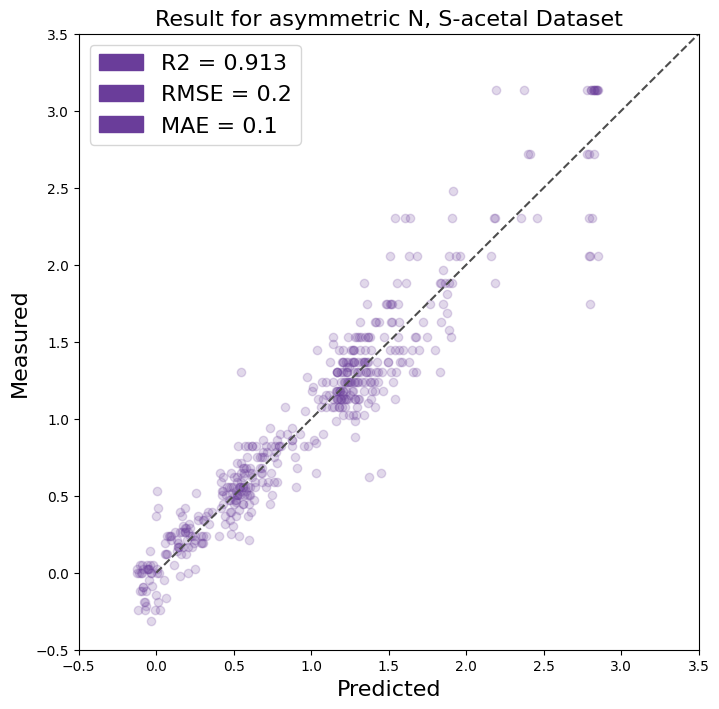

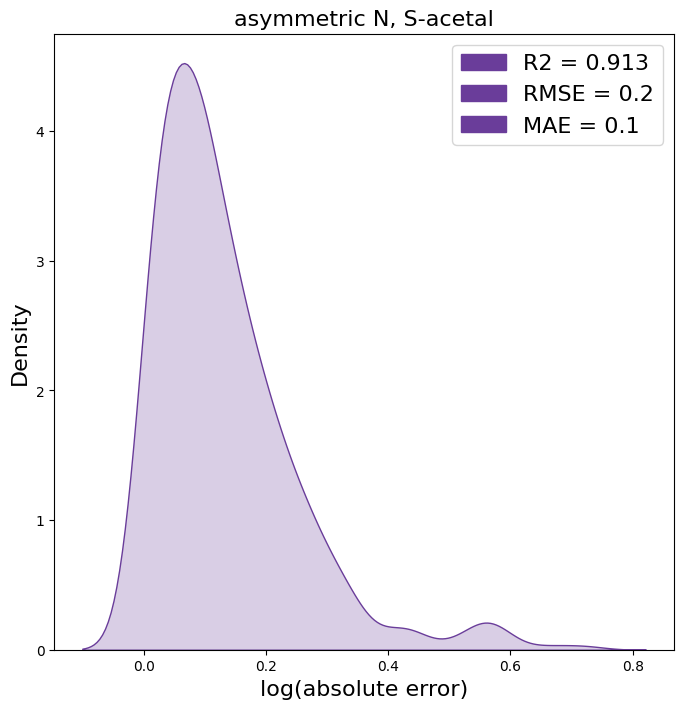

In [8]:
import pandas as pd 
name = 'asymmetric N, S-acetal'
df = pd.read_csv("result/data/Denmark_R2.csv")
y_test, y_pred = df.ytest.to_list(), df.ypred.to_list()
assert len(y_test) == len(y_pred)

color = colors[4]
fig1 = make_r2_plot(y_test, y_pred, name, xlim=(-0.5, 3.5), ylim=(-0.5, 3.5), has_legend=True, color=color)
fig1.savefig(f"result/images/{name}_R2.png", dpi=300, bbox_inches='tight')

fig2 = make_density_plot(df, name, color=color)
fig2.savefig(f"result/images/{name}_Density.png", dpi=300, bbox_inches='tight')

In [6]:
import pandas as pd
df = pd.read_csv("result/BH_all_pred.csv", index_col=0, sep="\t")
df.head(2)

,text,labels,ypreds,groups
0,COc1ccc(Cl)cc1*Cc1ccc(N)cc1*O=S(=O)(O[Pd]1c2cc...,0.538585,0.308,"['CCN=P', 'ccc', 'ccc(cc)C(C)C', 'cc(c)P(C(C)(..."
1,Brc1ccccn1*Cc1ccc(N)cc1*O=S(=O)(O[Pd]1c2ccccc2...,63.165204,58.752,"['cnc', 'ccc', 'ccc(cc)C(C)C', 'cc(c)P(C(C)(C)..."


In [8]:
df['diff'] = abs(df.labels-df.ypreds)
df.sort_values(by="diff")

,text,labels,ypreds,groups,diff
289,COc1ccc(Cl)cc1*Cc1ccc(N)cc1*O=S(=O)(O[Pd]1c2cc...,0.000000,0.019,"['ccc', 'ccc(cc)C(C)C', 'cc(c)P(C(C)(C)C)C(C)(...",0.019000
249,FC(F)(F)c1ccc(Br)cc1*Cc1ccc(N)cc1*O=S(=O)(O[Pd...,37.935670,37.914,"['ccc', 'ccc(cc)C(C)C', 'cc(c)P(C(C)(C)C)C(C)(...",0.021670
747,Ic1ccccn1*Cc1ccc(N)cc1*O=S(=O)(O[Pd]1c2ccccc2-...,22.355122,22.381,"['CCN=P', 'cnc', 'ccc', 'ccc(cc)C(C)C', 'PN=P'...",0.025878
587,Brc1ccccn1*Cc1ccc(N)cc1*O=S(=O)(O[Pd]1c2ccccc2...,51.647648,51.615,"['cnc', 'ccc', 'ccc(cc)C(C)C', 'cNc(cc)cc', 'C...",0.032648
865,FC(F)(F)c1ccc(I)cc1*Cc1ccc(N)cc1*O=S(=O)(O[Pd]...,50.124677,50.159,"['ccc', 'ccc(cc)C(C)C', 'cc(c)P(C(C)(C)C)C(C)(...",0.034323
...,...,...,...,...,...
719,COc1ccc(Cl)cc1*Cc1ccc(N)cc1*O=S(=O)(O[Pd]1c2cc...,8.389648,29.016,"['CCN=P', 'ccc', 'ccc(cc)C(C)C', 'cc(c)P(C(C)(...",20.626352
1011,Clc1ccccn1*Cc1ccc(N)cc1*O=S(=O)(O[Pd]1c2ccccc2...,14.031850,36.593,"['cnc', 'ccc', 'ccc(cc)C(C)C', 'cc(c)P(C(C)(C)...",22.561150
291,Ic1cccnc1*Cc1ccc(N)cc1*O=S(=O)(O[Pd]1c2ccccc2-...,76.451268,52.322,"['CCN=P', 'cnc', 'ccc', 'ccc(cc)C(C)C', 'PN=P'...",24.129268
724,COc1ccc(Br)cc1*Cc1ccc(N)cc1*O=S(=O)(O[Pd]1c2cc...,8.970204,36.296,"['ccc', 'cccno', 'ccc(cc)C(C)C', 'cc(c)P(C(C)(...",27.325796
